# Seattle Airbnb Analysis
In this notebook we are using the seatlle airbnb dataset from Kaggle ([link](https://www.kaggle.com/datasets/airbnb/seattle)) to better understand how the earning and pricing of different housing listing differs across various region and timeframe of the year.

In [ ]:
# load necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [18]:
# load seatlle airbnb data from Kaggle

listings_df = pd.read_csv('./data/seattle/listings.csv')
reviews_df = pd.read_csv('./data/seattle/reviews.csv')
calendar_df = pd.read_csv('./data/seattle/calendar.csv')


## Exploratory Data Analysis
In this section I will explore the dimensions of datasets and missingness ratio. Understand the timeframe and rented price a bit more.

Based on EDA, we will mostly leverage the listings dataset to understand how the different listing features intereact with its review scores and listed pricing.

* listings_df contains the details of each listings including its region, neighborhood, review score, property feature, renting rule, listed price, etc..


In [112]:
print(listings_df.shape)
print(listings_df.columns)
display(listings_df.head(5))


(3818, 92)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'am

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


* reviews dataset contains textual comment from customers along with comment date and corresponding listing id

In [31]:
print(reviews_df.shape)
print(reviews_df.columns)
reviews_df.head(5)

(84849, 6)
Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


*  calendar_df listed the actual renting history with actual price paid 
(can be join to listings data frame through listing_id)

In [32]:
print(calendar_df.shape)
calendar_df.head(5)

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


count    3171.000000
mean       94.539262
std         6.606083
min        20.000000
25%        93.000000
50%        96.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64


Text(0.5, 1.0, 'Review Score Histogram')

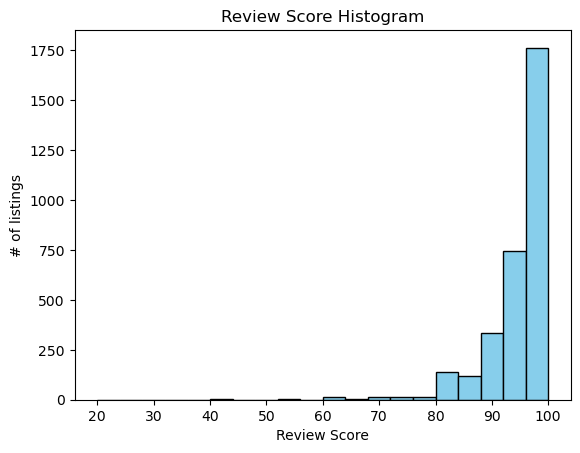

In [49]:
# explore the distribution of the listing reviews

print(listings_df['review_scores_rating'].describe())

plt.hist(listings_df['review_scores_rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Review Score')
plt.ylabel('# of listings')
plt.title('Review Score Histogram')

In [117]:
# explore the relationship between selected variables
var_list= [
    'price', 
    'monthly_price',
    'weekly_price',
    'property_type',
    'room_type',
    'square_feet', 
    'beds',
    'cancellation_policy',
    'review_scores_rating', 
    'review_scores_location',
    'review_scores_value',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'bedrooms',
    'host_is_superhost']
new_df = listings_df[var_list]

# convert cancellation column to numerical based on how strict the policy is
set(new_df['cancellation_policy'])
cancellation_d = {'flexible': 0,
    'moderate':1,
    'strict':2}
new_df['cancellation_policy_num'] = new_df['cancellation_policy'].map(cancellation_d)

# convert price columns to numerical
new_df['price_clean'] = pd.to_numeric(new_df['price'].str.replace('$',''), errors='coerce')

/var/folders/3s/ptv6brm105b82bssvtk6p41c0000gn/T/ipykernel_5076/3459352967.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cancellation_policy_num'] = new_df['cancellation_policy'].map(cancellation_d)
/var/folders/3s/ptv6brm105b82bssvtk6p41c0000gn/T/ipykernel_5076/3459352967.py:30: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df['price_clean'] = pd.to_numeric(new_df['price'].str.replace('$',''), errors='coerce')
/var/folders/3s/ptv6brm105b82bssvtk6p41c0000gn/T/ipykernel_5076/3459352967.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [119]:
new_df.head(6)

,price,monthly_price,weekly_price,property_type,room_type,square_feet,beds,cancellation_policy,review_scores_rating,review_scores_location,review_scores_value,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,bedrooms,host_is_superhost,cancellation_policy_num,price_clean
0,$85.00,NaN,NaN,Apartment,Entire home/apt,NaN,1.0,moderate,95.0,9.0,10.0,10.0,10.0,10.0,10.0,1.0,f,1,85.0
1,$150.00,"$3,000.00","$1,000.00",Apartment,Entire home/apt,NaN,1.0,strict,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,t,2,150.0
2,$975.00,NaN,NaN,House,Entire home/apt,NaN,7.0,strict,97.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,f,2,975.0
3,$100.00,"$2,300.00",$650.00,Apartment,Entire home/apt,NaN,2.0,flexible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,f,0,100.0
4,$450.00,NaN,NaN,House,Entire home/apt,NaN,3.0,strict,92.0,9.0,9.0,9.0,9.0,10.0,10.0,3.0,f,2,450.0
5,$120.00,NaN,$800.00,House,Private room,NaN,1.0,strict,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,f,2,120.0


### Houses and Apartments are the most commonly listed property type in Seattle with average priced at $120~130 per night


Q: What's the property type that has highest price listed?  
A: 'Boat' follow by 'Condominium' but there are only small amount listing for this type.

Q: What's the property type that has lowest price listed?  
A: 'Dorm' and 'Tent'

Q: What's the most common property type listed?  
A: Houses and Apartments

In [115]:
df_price_clean.columns

Index(['price', 'monthly_price', 'weekly_price', 'property_type', 'room_type',
       'square_feet', 'beds', 'cancellation_policy', 'review_scores_rating',
       'bedrooms', 'host_is_superhost', 'cancellation_policy_num',
       'price_clean'],
      dtype='object')

In [ ]:

df_price_clean = new_df.dropna(subset=('price_clean'))
df_summary = df_price_clean.groupby(['property_type']).agg({
    'price_clean':'mean',
    'square_feet':'mean',
    'beds':'mean',
    'review_scores_rating':'mean',
    'bedrooms':'mean',
    'cancellation_policy_num':'mean',
    'review_scores_rating':'mean',
    'property_type':'size',
}).sort_values(['price_clean'], ascending=False)
df_summary['property_volume_pct']=df_summary['property_type']/df_price_clean.shape[0]
display(df_summary)

In [ ]:
# aggregate price and availability by listing_id in calendar data frame
mapping_tf={'t':1,'f':0}
calendar_df['available_dummy']=calendar_df['available'].replace(mapping_tf) 
calendar_df['price_clean'] = pd.to_numeric(calendar_df['price'].str.replace('$',''),errors='coerce')

calendar_agg = calendar_df.groupby('listing_id').agg({
    'available_dummy':[('days_available','sum')],
    'price_clean':[('price_mean','mean')],
})

/var/folders/3s/ptv6brm105b82bssvtk6p41c0000gn/T/ipykernel_5076/1002836848.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_df['price_clean'] = pd.to_numeric(calendar_df['price'].str.replace('$',''),errors='coerce')


### What time of year there are most listings available on Airbnb, what's the average price listed?

In [ ]:
calendar_df['date']=pd.to_datetime(calendar_df['date'])
calendar_df['year']=calendar_df['date'].dt.year
calendar_df['month']=calendar_df['date'].dt.month
summary_avg_by_month = calendar_df.groupby(['year','month']).agg({
    'available_dummy':[('total_listings','sum')],
    'price_clean':[('average_price','mean')],
    'date': [('starting_date','min'),
    ('date_unique','nunique')]
}).reset_index()
#summary_avg_by_month['listings_per_day'] = summary_avg_by_month['total_listings']/summary_avg_by_month['date_unique']
print(summary_avg_by_month.columns)

# Dropping 2017 January since only 2 days available
drop_index=(summary_avg_by_month['month']==1) & (summary_avg_by_month['year']==2017)
summary_avg_by_month = summary_avg_by_month[~drop_index]
summary_avg_by_month

MultiIndex([(           'year',               ''),
            (          'month',               ''),
            ('available_dummy', 'total_listings'),
            (    'price_clean',  'average_price'),
            (           'date',  'starting_date'),
            (           'date',    'date_unique')],
           )


year month available_dummy   price_clean          date            
                total_listings average_price starting_date date_unique
0   2016     1           59239    121.256898    2016-01-04          28
1   2016     2           73321    123.947429    2016-02-01          29
2   2016     3           83938    127.963804    2016-03-01          31
3   2016     4           76037    134.400282    2016-04-01          30
4   2016     5           79971    138.832159    2016-05-01          31
5   2016     6           77244    146.771935    2016-06-01          30
6   2016     7           74222    151.286857    2016-07-01          31
7   2016     8           76347    149.712349    2016-08-01          31
8   2016     9           77246    142.285931    2016-09-01          30
9   2016    10           82438    136.140247    2016-10-01          31
10  2016    11           81780    134.815529    2016-11-01          30
11  2016    12           87061    136.306108    2016-12-01          31

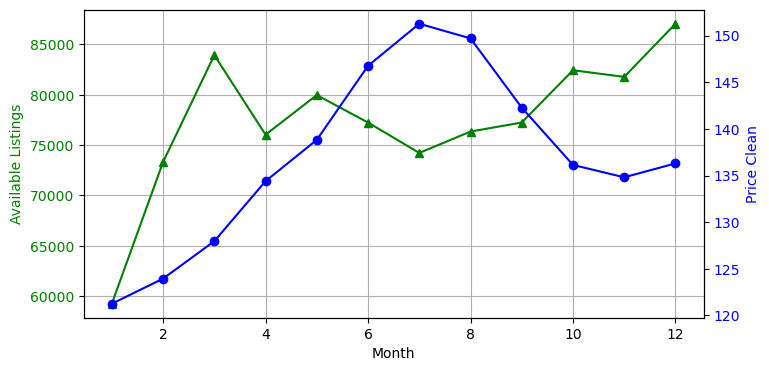

In [ ]:
# Plotting the line chart with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plotting available_dummy on the first y-axis
ax1.plot(summary_avg_by_month['month'], summary_avg_by_month['available_dummy'], color='g', marker='^')
ax1.set_xlabel('Month')
ax1.set_ylabel('Available Listings', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.grid(True)

# Creating a second y-axis
ax2 = ax1.twinx()

# Plotting price_clean on the second y-axis
ax2.plot(summary_avg_by_month['month'], summary_avg_by_month['price_clean'], color='b', marker='o')
ax2.set_ylabel('Price Clean', color='b')
ax2.tick_params(axis='y', labelcolor='b')

- Based on above chart, we are able to see the March and holiday season (from October to December) has most listings available on the webstie

- Price wise, the summer listing averaged highest at around $150 per night. The begning of the year from January to March, the price is the lowest with $120~130 per night.

### **Neighborhood To Visit**
Q: Which neighborhood to choose when visiting seattle?  
Q: Which neighborhood is pricey which are not? 
